##### Download the dataset

In [3]:
import pandas as pd

In [4]:
dataset = pd.read_csv('Placement.csv')

In [5]:
dataset


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


##### 1)Replace the NaN values with correct value. And justify why you have chosen the same.

In [6]:
dataset.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

<Axes: xlabel='salary', ylabel='Count'>

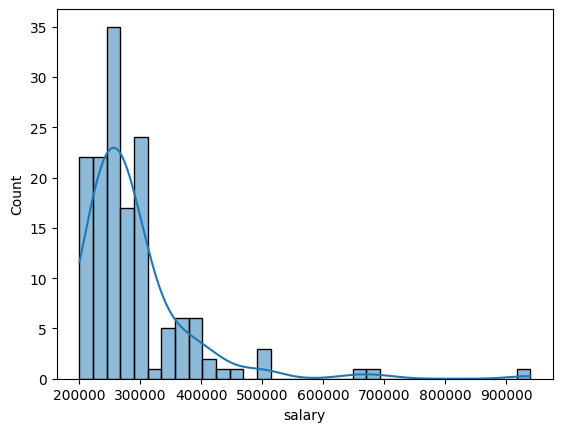

In [7]:
import seaborn as sns
sns.histplot(dataset['salary'], kde=True)


In [8]:
dataset['salary'].skew()

3.5697471998711054

In [9]:
dataset['status'].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

In [10]:
dataset[dataset['status']=='Not Placed']['salary']

3     NaN
5     NaN
6     NaN
9     NaN
12    NaN
       ..
198   NaN
201   NaN
206   NaN
208   NaN
214   NaN
Name: salary, Length: 67, dtype: float64

In [11]:
# check if status placed students and salary 
dataset[(dataset['status'] == 'Placed') & (dataset['salary'].isna())].shape


(0, 15)

In [12]:
dataset['salary'].fillna(0, inplace=True)

C:\Users\jsril\AppData\Local\Temp\ipykernel_6736\3791302973.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['salary'].fillna(0, inplace=True)


##### 2)How many of them are not placed?

In [13]:
dataset['status'].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

#####  3)Find the reason for non placement from the dataset?
##### Answer: lower academic performance, lack of work experience, and less in-demand MBA specializations or degree types.
.

##### 4)What kind of relation between salary and mba_p

In [14]:
dataset['mba_p'].corr(dataset['salary'])

0.13982273892615557

In [15]:
correlation = dataset[dataset['status'] == 'Placed']['mba_p'].corr(dataset[dataset['status'] == 'Placed']['salary'])
correlation

0.17501294069527482

##### 5)Which specialization is getting minimum salary?

In [16]:
minsalary = dataset[dataset['status'] == 'Placed']['salary'].min()
result = dataset[(dataset['status'] == 'Placed') & (dataset['salary']==minsalary)]['specialisation']
result.unique()

array(['Mkt&Fin', 'Mkt&HR'], dtype=object)

##### 6)How many of them getting above 500000 salary?

In [17]:
dataset[dataset['salary']>500000]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
119,120,M,60.8,Central,68.40,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
150,151,M,71.0,Central,58.66,Central,Science,58.0,Sci&Tech,Yes,56.00,Mkt&Fin,61.30,Placed,690000.0
177,178,F,73.0,Central,97.00,Others,Commerce,79.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0


In [18]:
dataset.drop('sl_no',axis=1,inplace=True)

##### 7)Test the Analysis of Variance between etest_p and mba_p at signifance level 5%.(Make decision using Hypothesis Testing)

In [19]:
from scipy import stats

# Get the values for etest_p and mba_p
ettest_p_values = dataset['etest_p']
mba_p_values = dataset['mba_p']

# Perform One-way ANOVA
f_stat, p_value = stats.f_oneway(ettest_p_values, mba_p_values)
print(p_value)
# Hypothesis Testing Decision
if p_value < 0.05:
    print("Reject Null Hypothesis: There is a significant difference between etest_p and mba_p.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference between etest_p and mba_p.")

4.672547689133573e-21
Reject Null Hypothesis: There is a significant difference between etest_p and mba_p.


* If the p-value is less than 0.05, then **reject the null hypothesis** and conclude there is a significant difference. accept H1
* If the p-value is greater than 0.05, then **failed to reject the null hypothesis**, meaning the means are statistically similar. accept H0

##### 8)Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level of 5%.(Make decision using Hypothesis Testing
##### Unpaired sample - Different group same condition 

In [20]:
from scipy.stats import ttest_ind
dataset= dataset.dropna()
deg_t = dataset[dataset['degree_t']=='Sci&Tech']['salary']
spec_t = dataset[dataset['specialisation']=='Mkt&HR']['salary']

print(f"Number of Sci&Tech salaries: {len(deg_t)}")
print(f"Number of Mkt&HR salaries: {len(spec_t)}")

t_stats, p_value = ttest_ind(deg_t,spec_t)
print(t_stats,p_value)
# Hypothesis Testing Decision
if p_value < 0.05:
    print("Reject Null Hypothesis: There is a significant difference in salary between Sci&Tech and Mkt&HR students.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference in salary between Sci&Tech and Mkt&HR students.")

Number of Sci&Tech salaries: 59
Number of Mkt&HR salaries: 95
2.692041243555374 0.007897969943471179
Reject Null Hypothesis: There is a significant difference in salary between Sci&Tech and Mkt&HR students.


##### 9)Convert the normal distribution to standard normal distribution for salary column

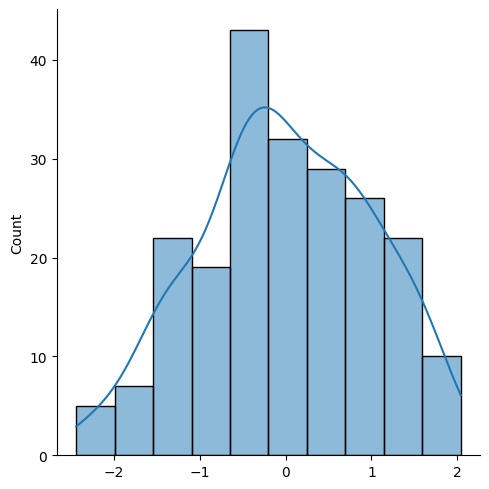

In [21]:
def SND(d):
    import seaborn as sns
    mean = d.mean()
    std = d.std()
    values = [i for i in d]
    # print(values)
    zscore = [((j-mean)/std) for j in values]
    # print(zscore)
    res = sum(zscore)
    # print(res)
    sns.displot(zscore,kde=True)
SND(dataset['ssc_p'])
    

##### 10)What is the probability Density Function of the salary range from 700000 to 900000?

In [22]:
from scipy.stats import norm

startrange=700000
endrange=900000
sample = dataset['salary']
# calculate parameters
sample_mean =sample.mean()
sample_std = sample.std()
print('Mean=%.3f, Standard Deviation=%.3f', (sample_mean, sample_std))
# define the distribution
dist = norm(sample_mean, sample_std)
p1 = dist.pdf(startrange)
p2 = dist.pdf(endrange)
p3 = p1-p2
print(p3)


Mean=%.3f, Standard Deviation=%.3f (198702.32558139536, 154780.92671560106)
1.3506388093272432e-08


#####  11)Test the similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p at significance level of 5%.(Make decision using Hypothesis Testing)
##### Paired sample - same group different condition

In [23]:
from scipy.stats import ttest_ind
dataset= dataset.dropna()
etest = dataset[dataset['degree_t']=='Sci&Tech']['etest_p']
mba = dataset[dataset['degree_t']=='Sci&Tech']['mba_p']

t_stats, p_value = ttest_ind(etest,mba)
print(t_stats,p_value)
# Hypothesis Testing Decision
if p_value < 0.05:
    print("Reject Null Hypothesis: There is a significant difference between etest_p and mba_p.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference between etest_p and mba_p.")

4.532000225151251 1.4289217003775636e-05
Reject Null Hypothesis: There is a significant difference between etest_p and mba_p.


##### 12)Which parameter is highly correlated with salary?
##### 13) plot any useful graph and explain it

`Correlation can be found in numerical columns only. So, to find the correlation we need to split the columns into quantitative and qualitative columns. the categorical columns have datatype object storing in qualitative list and other datatype columns are storing in quantitative list. Then we can easily find the correlation for the quantitative columns`

In [24]:
quan = []
qual = []
for column in dataset.columns:
    if dataset[column].dtype =='O':
        qual.append(column)
    else:
        quan.append(column)
        

In [25]:
dataset[quan].corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


**This table says that the ssc_p has highly correlated with salary. Because the correlation value is higher than the other columns.
Correlation coeff = 0.53 strong positive correlation**

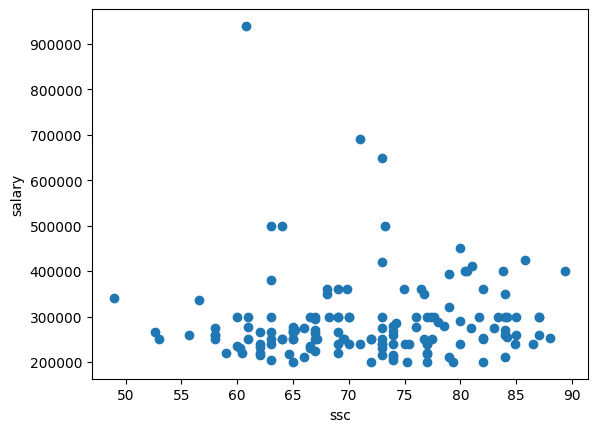

In [26]:
import matplotlib.pyplot as plt
x=dataset[dataset['status'] == 'Placed']['ssc_p']
y=dataset[dataset['status'] == 'Placed']['salary']
plt.scatter(x,y)

plt.xlabel('ssc')
plt.ylabel('salary')
plt.show()

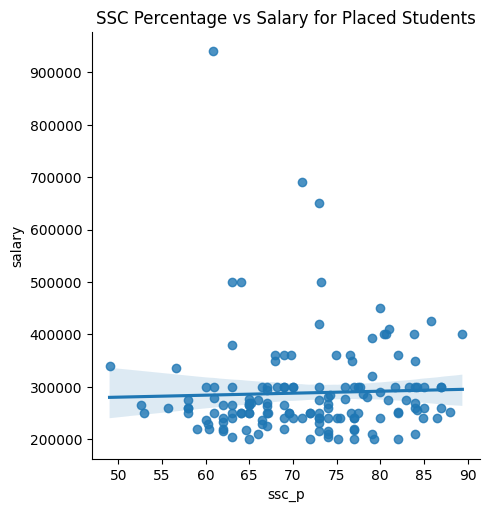

In [27]:
import seaborn as sns

sns.lmplot(x='ssc_p', y='salary', data=dataset[dataset['status'] == 'Placed'])
plt.title('SSC Percentage vs Salary for Placed Students')
plt.show()


`The students with higher ssc_p mark tend to get higher salaries although sometimes it may vary based on the other factors & other columns.`